# Exercises
Using the `titanic` data, in your `classification-exercises` repository, create a notebook, `model.ipynb` where you will do the following:

In [1]:
from env import my_setup
my_setup()


import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare
    


In [2]:
import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare

In [5]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [6]:
df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male
0,0,0,3,1,0,7.2500,0,1
1,1,1,1,1,0,71.2833,0,0
2,2,1,3,0,0,7.9250,1,0
3,3,1,1,1,0,53.1000,0,0
4,4,0,3,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1
887,887,1,1,0,0,30.0000,1,0
888,888,0,3,1,2,23.4500,0,0
889,889,1,1,0,0,30.0000,1,1


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### 1. What is your baseline prediction? 

In [18]:
survived_mode = df.survived.mode().values[0]

if survived_mode == 1:
    print(f'We think Everyone Survived!! \n{survived_mode = }')
else:
    print(f'We think Everyone DIED! \n{survived_mode = }')

We think Everyone DIED! 
survived_mode = 0


In [22]:
df['baseline'] = df.survived.value_counts().idxmax()
df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,baseline
0,0,0,3,1,0,7.2500,0,1,0
1,1,1,1,1,0,71.2833,0,0,0
2,2,1,3,0,0,7.9250,1,0,0
3,3,1,1,1,0,53.1000,0,0,0
4,4,0,3,0,0,8.0500,1,1,0
...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0
887,887,1,1,0,0,30.0000,1,0,0
888,888,0,3,1,2,23.4500,0,0,0
889,889,1,1,0,0,30.0000,1,1,0


In [30]:
df.drop(columns='passenger_id', inplace=True)

### What is your baseline accuracy? 

In [31]:
(df.survived == df.baseline).mean()

0.6161616161616161

### remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 

### When you make those predictions, what is your accuracy? 

In [32]:
(df.survived == df.baseline).mean()

0.6161616161616161

In [33]:
train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 8)

Train: (534, 8)
Validate: (178, 8)
Test: (179, 8)


In [34]:
(train.survived == train.baseline).mean()

0.6161048689138576

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  534 non-null    int64  
 1   pclass    534 non-null    int64  
 2   sibsp     534 non-null    int64  
 3   parch     534 non-null    int64  
 4   fare      534 non-null    float64
 5   alone     534 non-null    int64  
 6   sex_male  534 non-null    uint8  
 7   baseline  534 non-null    int64  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 33.9 KB


### This is your baseline accuracy.

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [41]:
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report

In [36]:
X_cols = ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
y_col = 'survived'

In [38]:
X_train, y_train = train[X_cols], train[y_col]

In [39]:
X_validate, y_validate, X_test, Y_test \
= validate[X_cols], validate[y_col], test[X_cols], test[y_col]


In [42]:
model_1 = DecisionTreeClassifier()

In [45]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male
455,3,0,0,7.8958,1,1
380,1,0,0,227.5250,1,0
492,1,0,0,30.5000,1,1
55,1,0,0,35.5000,1,1
243,3,0,0,7.1250,1,1


In [46]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [47]:
model_1.fit(X_train, y_train)

print(f'traing score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

traing score: 94.19%
validate score: 75.28%


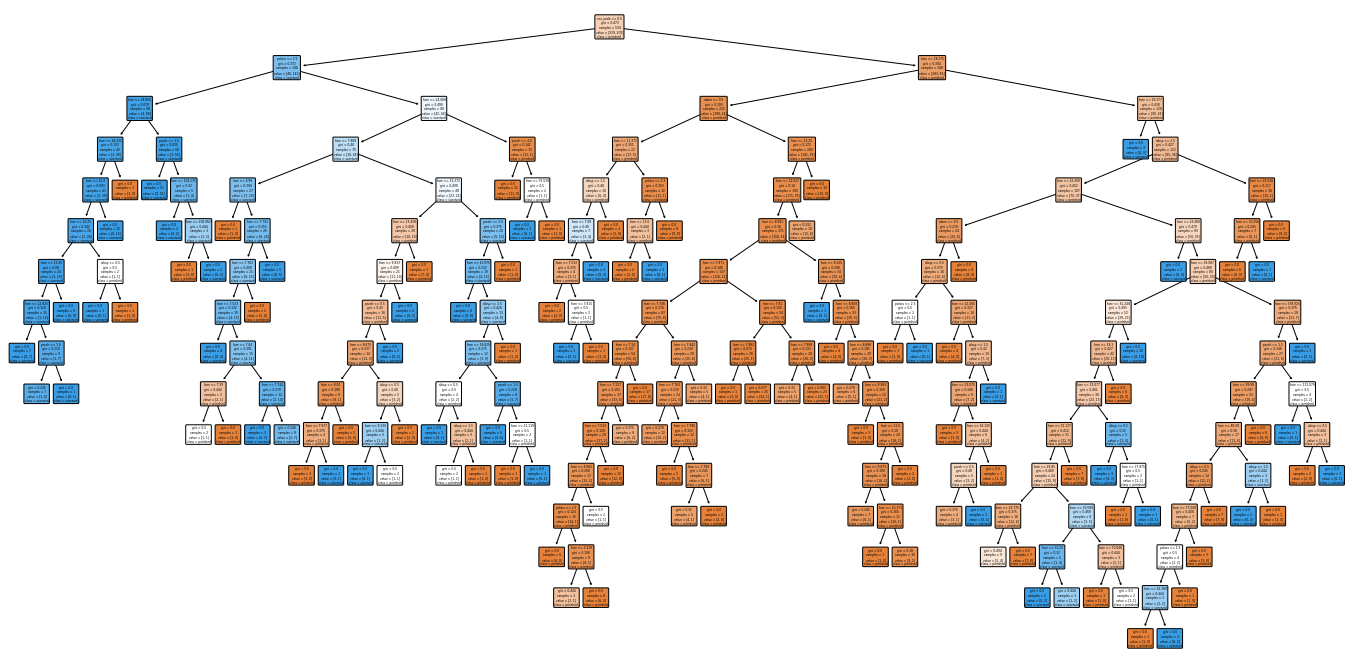

In [50]:
plt.figure(figsize=(24,12))
plot_tree(model_1, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

In [51]:
model_1.feature_importances_

array([0.09590748, 0.0622203 , 0.03353685, 0.4279973 , 0.00654879,
       0.37378928])

In [52]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_)))

pclass      0.095907
sibsp       0.062220
parch       0.033537
fare        0.427997
alone       0.006549
sex_male    0.373789
dtype: float64

<AxesSubplot:ylabel='Feature Weights'>

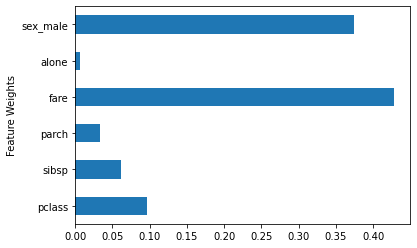

In [58]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 4. Compute: Accuracy, 

In [94]:
# first, let's create a dataframe for our y predictions and baseline.
preds = pd.DataFrame(
{
    'actual': y_validate.values,
    'baseline': 0,
    'model_1': model_1.predict(X_validate[X_cols]),
    'model_2': model2.predict(X_validate[X_cols]),
#     'model_3': model3.predict(X_validate[X_cols])
})

In [95]:
preds

,actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
173,1,0,0,0
174,0,0,0,0
175,1,0,1,1
176,1,0,1,1


In [56]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6179775280898876

In [57]:
(y_preds.y_actual == y_preds.model_1).mean()

0.7528089887640449

In [81]:
accuracy_score(y_preds.y_actual, y_preds.model_1)

0.7528089887640449

### true positive rate, 

In [74]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

False    132
True      46
dtype: int64

In [75]:
# true_positive = 
46/178

0.25842696629213485

### false positive rate, 

In [84]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

22

In [77]:
# false_positive = 
22/178

0.12359550561797752

### true negative rate, 

In [73]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    90
True     88
dtype: int64

In [78]:
# true_negative = 
88 / 178

0.4943820224719101

### false negative rate, 

In [79]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    156
True      22
dtype: int64

In [80]:
# false_negative = 
22 / 178

0.12359550561797752

### precision, 

In [88]:
Percent(precision_score(y_preds.y_actual, y_preds.model_1))

67.65%

### recall, 

In [90]:
Percent(recall_score(y_preds.y_actual, y_preds.model_1))

67.65%

### f1-score, 

In [92]:
print(classification_report(y_preds.y_actual,y_preds.model_1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 5. Run through steps 2-4 using a different max_depth value.

In [93]:
# TODO: create additional models
# change hyperparameters
# change feature sets
# compare model performance on validate
# make a new thing:
model2 = DecisionTreeClassifier(max_depth=4)
# fit a new thing:
model2.fit(X_train, y_train)
# use a new thing:
model2.score(X_train, y_train)

0.8202247191011236

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

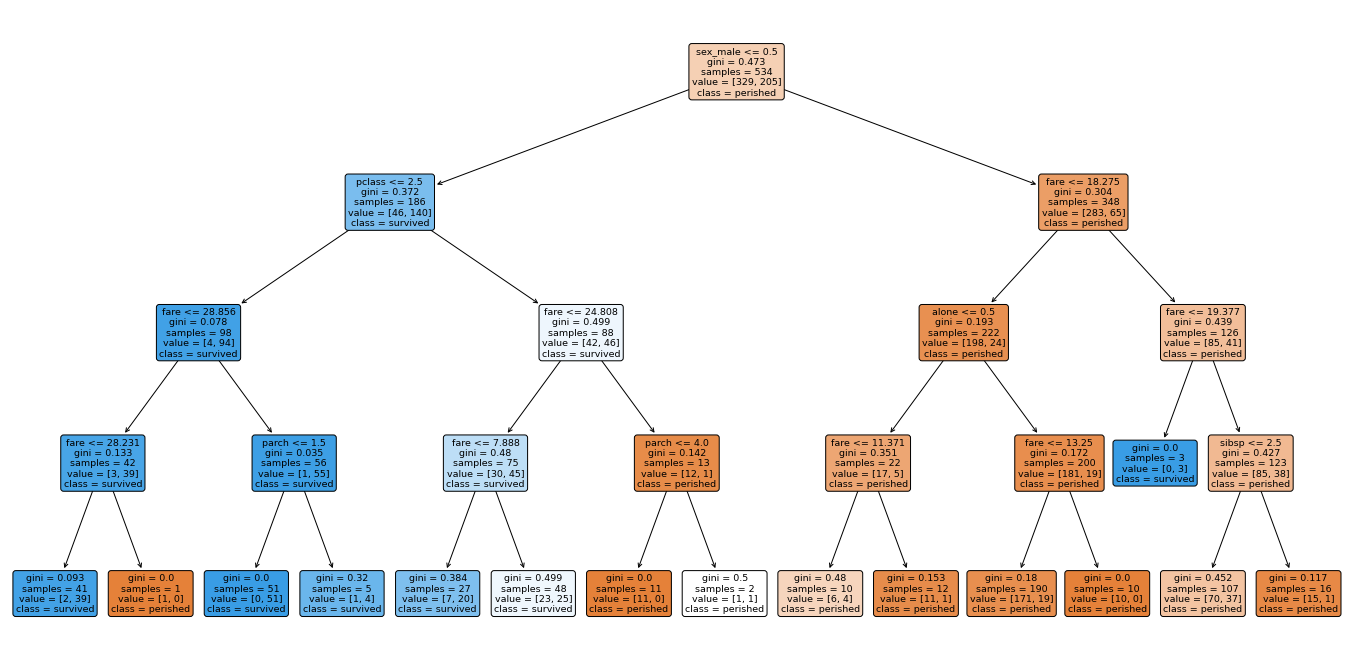

In [98]:
plt.figure(figsize=(24,12))
plot_tree(model2, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

<AxesSubplot:ylabel='Feature Weights'>

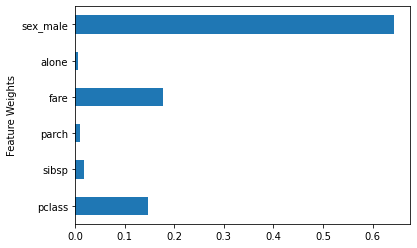

In [99]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [96]:
accuracy_score(preds.actual,preds.model_2)

0.7921348314606742

### 4. Compute: Accuracy, 

### true positive rate, 

In [122]:
TP = ((preds.actual == preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
TPR = TP/len(preds)
TPR

0.25842696629213485

### false positive rate, 

In [121]:
FP = ((preds.actual != preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
FPR = FP/len(preds.actual)
FPR

0.12359550561797752

### true negative rate, 

In [120]:
TN = ((preds.actual == preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
TNR = TN/len(preds)
TNR

0.5337078651685393

### false negative rate, 

In [119]:
FN = ((preds.actual != preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
FNR = FN/len(preds)
FNR

0.08426966292134831

In [123]:
def confusion():
    acc = (TP+TN)/(TP+TN+FP+FN)
    print(f'   Accuracy = {acc:.2%}')
    print(f'  Precision = {(TP/(TP+FP)):.2%}')
    print(f'        NPV = {Percent(TN/(TN+FN))}')
    print(f'     Recall = {Percent(TP/(TP+FN))}')
    print(f'Specificity = {Percent(TN/(TN+FP))}')

In [125]:
confusion()

   Accuracy = 79.21%
  Precision = 67.65%
        NPV = 86.36%
     Recall = 75.41%
Specificity = 81.20%


### precision, 

### recall, 

### f1-score, 

In [128]:
print(classification_report(preds.actual,preds.model_2), classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 6. Which model performs better on your in-sample data?

In [130]:
preds.model_1

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_1, Length: 178, dtype: int64

### 7. Which model performs best on your out-of-sample data, the validate set?

In [131]:
preds.model_2

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_2, Length: 178, dtype: int64

### 1. Work through these same exercises using the Telco dataset.

In [140]:
def prep_telco():
    df = acquire.get_telco_data()

    encode = ['partner', 'dependents', 'phone_service', 'internet_service_type', 
             'contract_type', 'paperless_billing', 'payment_type', 'churn']
    
    combine = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

    df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

    df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

    df.total_charges = df.total_charges.astype(float)

    df.drop(columns= ['null_charges', 'gender', 'multiple_lines', 'customer_id'], inplace=True)

    dummy_df = pd.get_dummies(df[encode], drop_first=True)

    df = pd.concat([df, dummy_df], axis=1)

    df = df.drop(columns=encode)
    print(df.info())
    return df

In [141]:
prep_telco()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   online_security                       7043 non-null   object 
 3   online_backup                         7043 non-null   object 
 4   device_protection                     7043 non-null   object 
 5   tech_support                          7043 non-null   object 
 6   streaming_tv                          7043 non-null   object 
 7   streaming_movies                      7043 non-null   object 
 8   monthly_charges                       7043 non-null   float64
 9   total_charges                         7043 non-null   float64
 10  partner_Yes                           7043 non-null   uint8  
 11  dependents_Yes   

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_88634/3522522056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]


,senior_citizen,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,...,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,churn_Yes
0,0,9,No,Yes,No,Yes,Yes,No,65.60,593.30,...,1,0,0,1,0,1,0,0,1,0
1,0,9,No,No,No,No,No,Yes,59.90,542.40,...,1,0,0,0,0,0,0,0,1,0
2,0,4,No,No,Yes,No,No,No,73.90,280.85,...,1,1,0,0,0,1,0,1,0,1
3,1,13,No,Yes,Yes,No,Yes,Yes,98.00,1237.85,...,1,1,0,0,0,1,0,1,0,1
4,1,3,No,No,No,Yes,Yes,No,83.90,267.40,...,1,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,Yes,No,No,Yes,No,No,55.15,742.90,...,1,0,0,1,0,0,0,0,1,0
7039,0,22,No,No,No,No,No,Yes,85.10,1873.70,...,1,1,0,0,0,1,0,1,0,1
7040,0,2,No,Yes,No,No,No,No,50.30,92.75,...,1,0,0,0,0,1,0,0,1,0
7041,0,67,Yes,No,Yes,Yes,No,Yes,67.85,4627.65,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
df[combine]

### 2. Experiment with this model on other datasets with a higher number of output classes.